Kaggle Heart Disease Project

data file taken from site : https://www.kaggle.com/ronitf/heart-disease-uci

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

Columns descriptions:

age : in years

sex :(1 = male; 0 = female)

cp: chest pain type (0-4)

trestbps: resting blood pressure (in mm Hg on admission to the hospital)

chol : serum cholestoral in mg/dl

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg : resting electrocardiographic results (0-2)

thalach : maximum heart rate achieved

exang : exercise induced angina (1 = yes; 0 = no)

oldpeak : ST depression induced by exercise relative to rest

slope : the slope of the peak exercise ST segment

ca :number of major vessels (0-3) colored by flourosopy

tha : l3 = normal; 6 = fixed defect; 7 = reversable defect

target : presence of heart disease (1 = presence of heart disease or 0 = presence of heart disease)



We can divide the features above into two groups: quantitative and categorical

Quantitative features: Age, trestbps, chol, thalach, oldpeak

Categorical features: sex, cp, fbs, restecg, exang, slope, ca, thal

In [70]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from scipy import stats
import statistics as st
import warnings

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seaborn graphs to a better style
sns.set(style="ticks", color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, auc, classification_report ##-1,2
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [71]:
import os
print(os.getcwd())

C:\Users\Busaba\Desktop\Launchcode Data_Science\Kaggle Heart Final Project\heart-disease-uci


In [72]:
heart_df = pd.read_csv('heart.csv')

Basic Details of the Dataframe

In [73]:
# view shape of the dataset includes how many total columns and rows
heart_df.shape

(303, 14)

In [74]:
#view the top of dataset
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [75]:
# view tail of dataset
heart_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [76]:
# view the count, mean, std dev, min/max and 25%, 50%, and 75% values for each column of dataset
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Conclusion: 303 incidents included in this study. 
Mean age is 54 years old.
75% of samples are around 61 years old or older, with the max age is 77 years old.
50% of samples have a  resting blood pressure at 130,  serum cholesterol level of 240 mg/dl, and maximum heart rate of 153.

In [77]:
# get info on dataframe
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [78]:
# determine if there are any empty spaces in dataframe
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Duplication and Outlier Detection and Removal in Dataframe

In [79]:
# check for duplicate observations- incident 163 and 164 are identical, I will remove copy(164) and keep original (163)
heart_df[heart_df.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [80]:
#identifies which row is duplicated
heart_df[heart_df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [81]:
# drop duplicate observation
heart_df = heart_df.drop_duplicates()

In [82]:
# verify duplicate was removed
heart_df[heart_df.duplicated() == True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [83]:
# view updated shape; The total row number should be 302 rows after removal of duplicate 
heart_df.shape

(302, 14)

In [84]:
#Find out how many people do (1) and don't (0) exhibit heart disease
heart_df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

In [85]:
#Distribution of heart disease between men and women
heart_df.groupby(['sex', 'target'])['sex'].count()

sex  target
0    0          24
     1          72
1    0         114
     1          92
Name: sex, dtype: int64

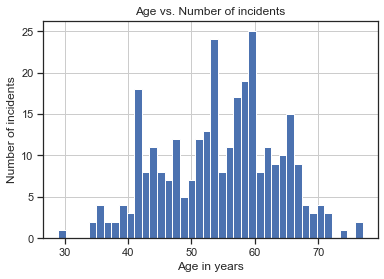

In [86]:
x = heart_df.age
plt.hist(x, bins=40)
plt.xlabel("Age in years")
plt.ylabel("Number of incidents")
plt.grid()
plt.title('Age vs. Number of incidents')
plt.show()


In [87]:
mean_age = x.mean()
mean_age

54.420529801324506

Conclusion of this age graph, it appears that most people are suffering from heart attacks are between the ages of 50 - 60. The mean age of a person who suffered a heart attack was 54.4. 

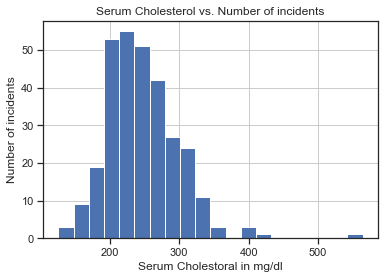

In [88]:
x = heart_df.chol
plt.hist(x, bins=20)
plt.xlabel("Serum Cholestoral in mg/dl")
plt.ylabel("Number of incidents")
plt.grid()
plt.title('Serum Cholesterol vs. Number of incidents')
plt.show()

In [89]:
mean_chol = x.mean()
mean_chol

246.5

Conclusion of this serum cholestoral graph, it appears that most people are have high serum cholesterol levels between 200-300 mg/dl. The mean serum cholesterol level of a person was 246.3. 

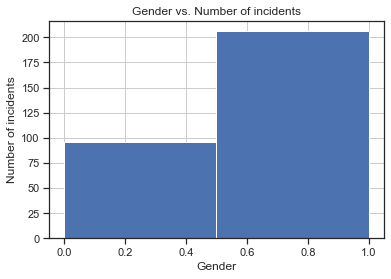

In [90]:
x=heart_df.sex
plt.hist(x,bins=2)
plt.xlabel("Gender")
plt.ylabel("Number of incidents")
plt.grid()
plt.title('Gender vs. Number of incidents')
plt.show()


In [91]:
total = len(heart_df['sex'])
male = sum(heart_df['sex'] == 1)
female = sum(heart_df['sex'] == 0)
total



302

In [92]:
percent_men= (male/total)*100
percent_women=(female/total)*100

print(percent_women)
print(percent_men)

31.788079470198678
68.21192052980133


Conclusion of this gender graph, it appears that more men (68.32%) suffer from heart attacks than women (31.68%). 

149.56953642384107

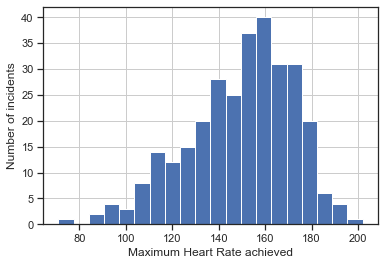

In [93]:
x = heart_df.thalach
plt.hist(x, bins=20)
plt.xlabel("Maximum Heart Rate achieved")
plt.ylabel("Number of incidents")
plt.grid()
mean_maxhr = x.mean()
mean_maxhr

Conclusion of this max HR graph, the maximum heart rate acheived for most patients was about 160 bpm, with the average being 150 bpm.

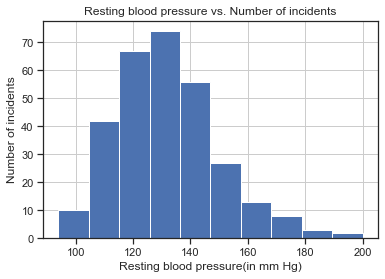

In [94]:
x = heart_df.trestbps
plt.hist(x,bins = 10)
plt.xlabel("Resting blood pressure(in mm Hg)")
plt.ylabel("Number of incidents")
plt.grid()
plt.title('Resting blood pressure vs. Number of incidents')
plt.show()


In [95]:
mean_bp = x.mean()
mean_bp


131.60264900662253

Conclusion of this resting blood pressure graph, most  patients prior to admission lies between 120 and 140. The mean resting blood pressure was 131.62.

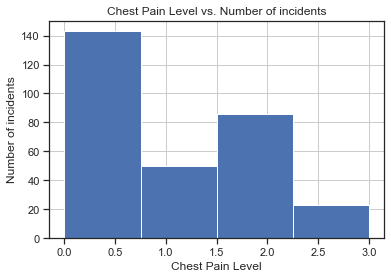

In [96]:
x = heart_df.cp
plt.hist(x,bins = 4)
plt.xlabel("Chest Pain Level")
plt.ylabel("Number of incidents")
plt.grid()
plt.title('Chest Pain Level vs. Number of incidents')
plt.show()


The conclusion of the chest pain graph, it tells us that a high number of incidents occurred  at chest pain level 0 for people who suffered a heart attack.


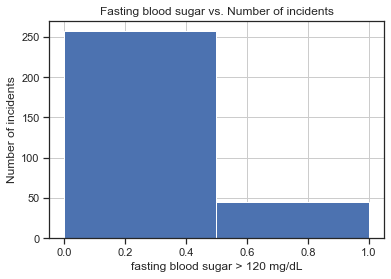

In [97]:
x = heart_df.fbs
plt.hist(x,bins = 2)
plt.xlabel("fasting blood sugar > 120 mg/dL")
plt.ylabel("Number of incidents")
plt.grid()
plt.title('Fasting blood sugar vs. Number of incidents')
plt.show()


In [98]:
# number of incidents that don't have a fasting blood sugar greater than 120mg/dL
fbs_0= sum(x==0)
fbs_0

257

In [99]:
# number of incidents that have a fasting blood sugar greater than 120mg/dL. 
fbs_1= sum(x==1)
fbs_1


45

The conclusion of the fasting blood sugar graph, 0 means fasting blood sugar was not more than 120 mg/dl. It appears that 258 people had a fasting blood sugar level less than 120mg/dL and only 45 people had a fasting blood sugar level higher than 120mg/dL.It appears that fsb has no impact on having heart disease. I will need to test further to confirm my conclusions.


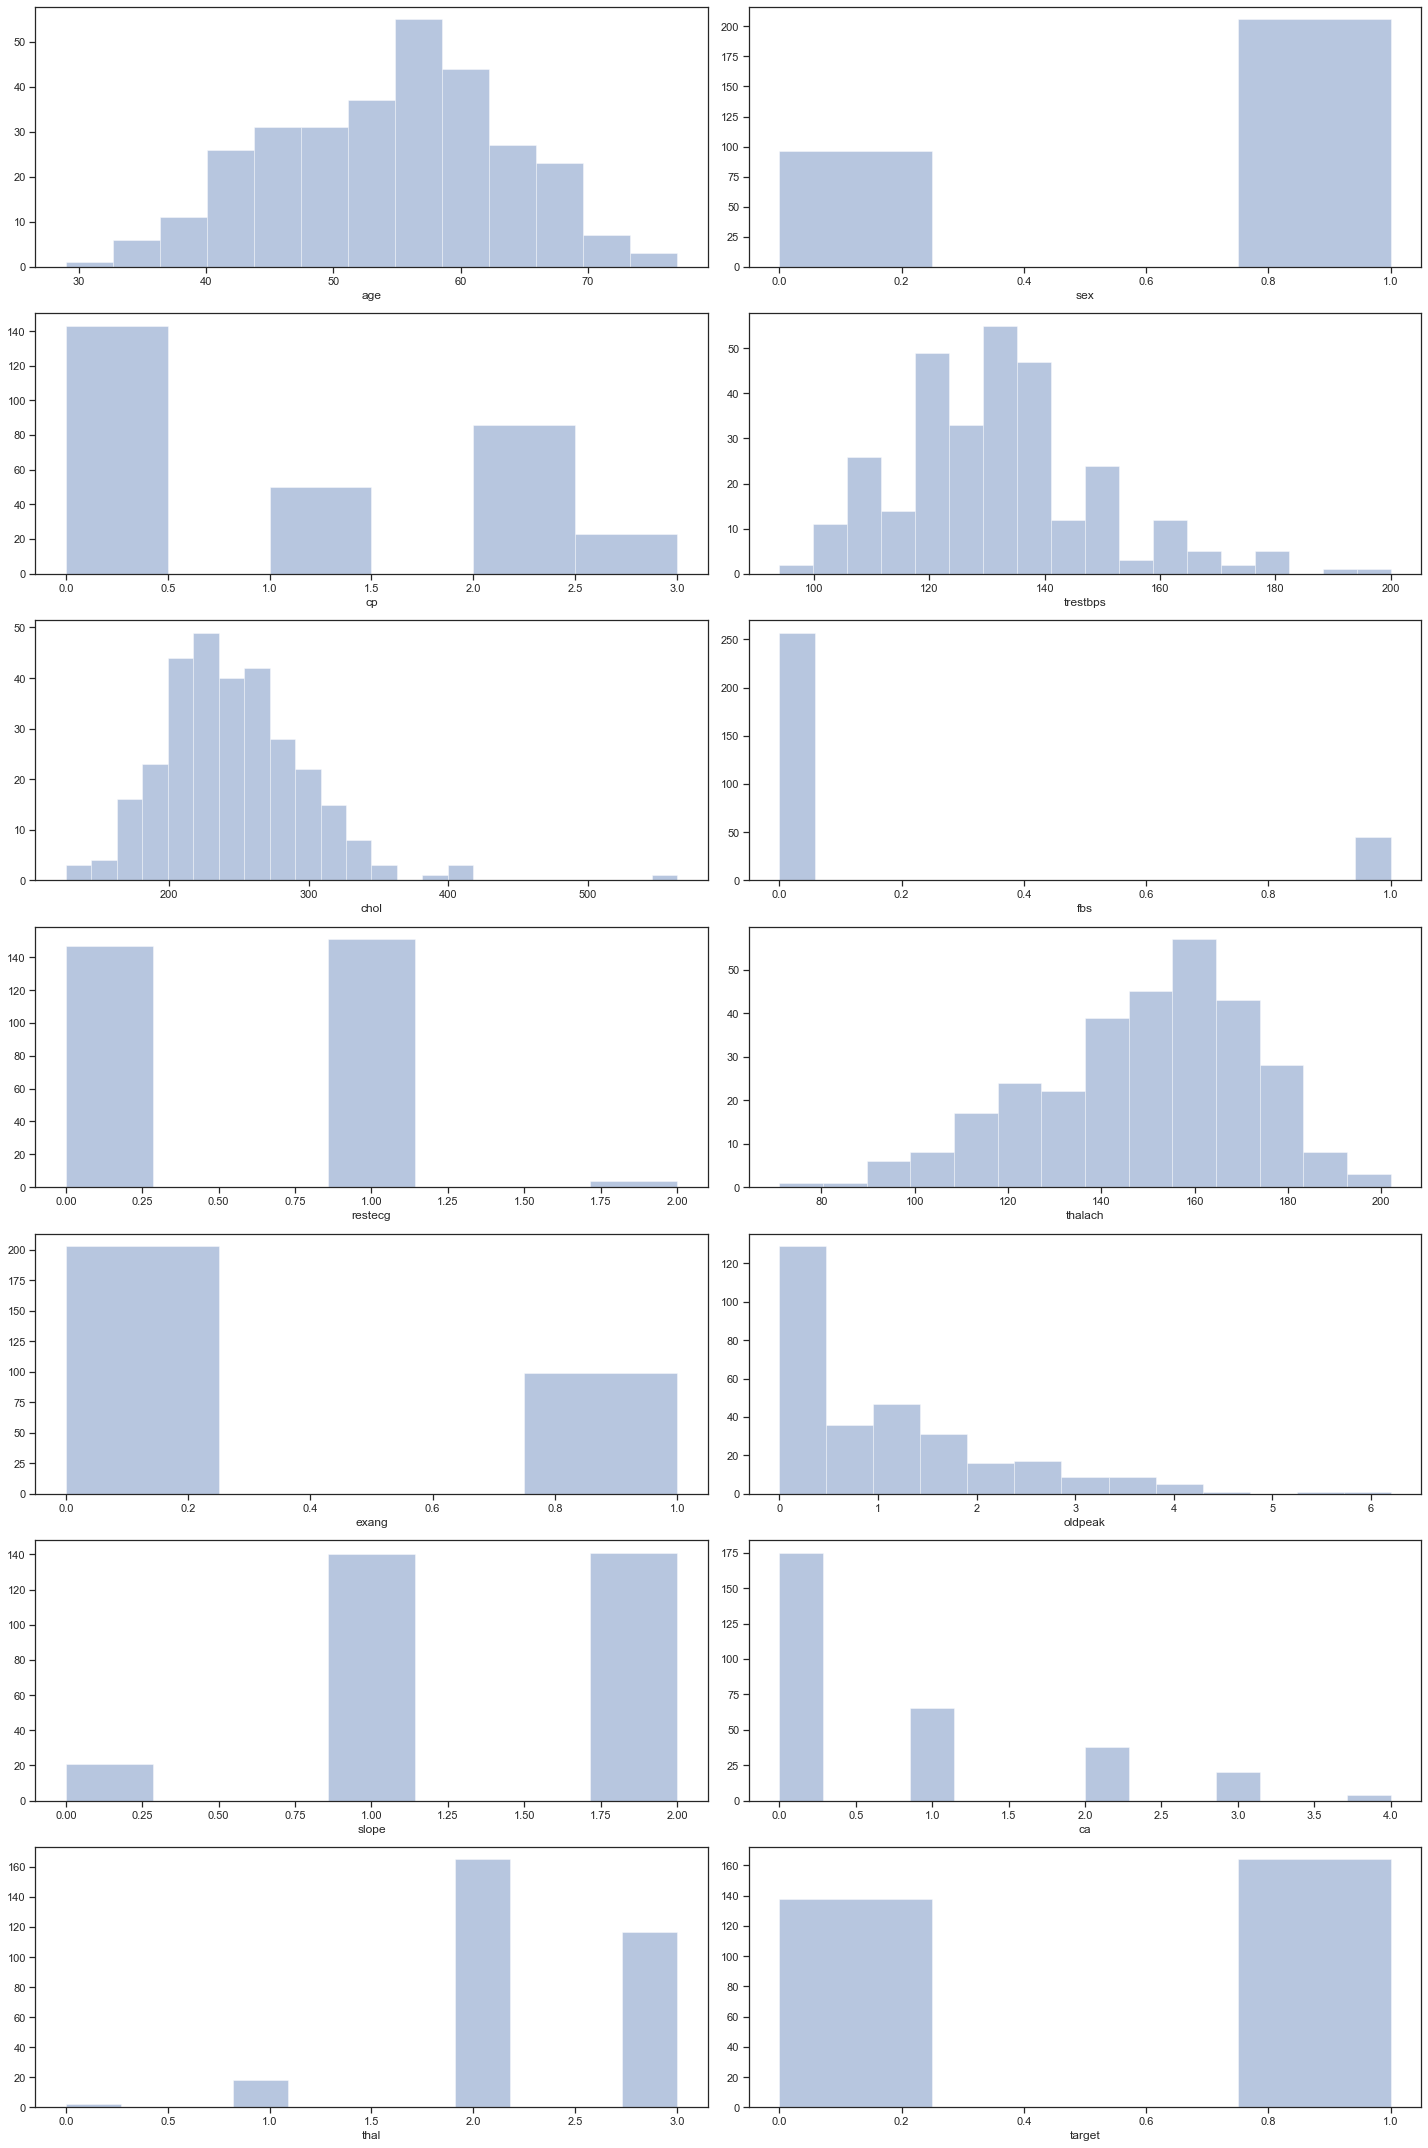

In [100]:
count = 0
f,axes=plt.subplots(7,2,figsize=(20,30))

for hr in range(7):
    for bn in range(2):
        sns.distplot(heart_df[heart_df.columns[count]],ax=axes[hr,bn],kde=False)
        sns.set(font_scale=1.0)
        plt.tight_layout()
        count+=1

Text(0.5, 1.0, ' Cholesterol vs Blood pressure in rest')

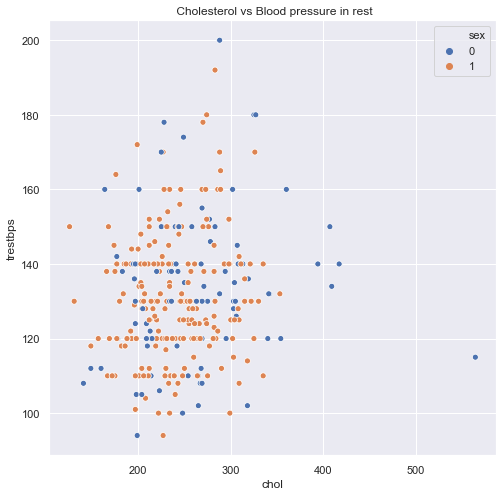

In [101]:
plt.rcParams['figure.figsize'] = (8,8)
sns.scatterplot(x='chol', y='trestbps', hue='sex', size=None, data=heart_df)
plt.title(' Cholesterol vs Blood pressure in rest')

Conclusion: There is one outlier with one patient identified as not having heart disease but has reading of over 500 with very  high cholesterol. I may need to remove this person, but I will need to investigate further before removal. There was no presence of separate clusters as there are increasing the serum cholesterol levels or resting blood pressure. 

Text(0.5, 1.0, 'Age vs Cholesterol')

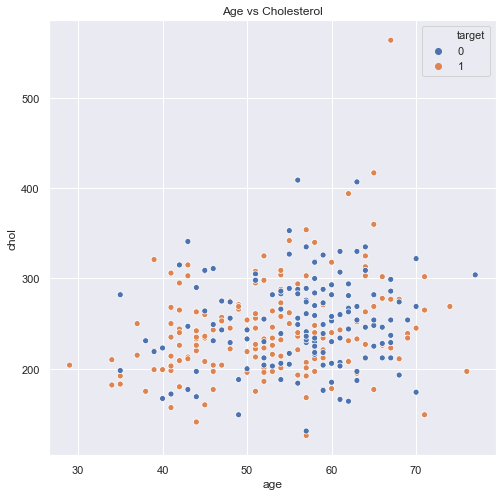

In [102]:
sns.scatterplot(x='age', y='chol', hue='target', data = heart_df)
plt.title('Age vs Cholesterol')

Conclusions: The highest density of the presence of heart disease represented by blue dots occurs in the range of serum cholesterol levels between 200-300 mg/dl and between the ages of 50 - 60. 


My Observations:
1)	Most people suffering heart attacks are between the age of 50 and 60. The mean age of a person who got a heart attack was 54.4.
2)	Men suffer from heart attacks significantly more often than women. In fact the percentage of men suffering from a heart attack in this dataset was calculated to be 68% while the percentage of women suffering from a heart attack was seen to be 32%.
3)	Most of the people who got a heart attack suffered from level 0 chest pains prior to the attack.
4)	Resting blood pressure most frequently seen in patients prior to admission lies between 120 and 140. The mean resting blood pressure was 131.6.
5)	A healthy cholesterol level in most humans is less than 200. From this graph we learn that people with heart disease have significantly higher cholesterol than average humans. The mean cholesterol level in this data set is 246.3. The lowest cholesterol level was 126 while the highest was seen to be 564. Since there is only a single case of the max cholesterol, it may be an anomaly.
6)	Most of the people in this data set had a fasting blood sugar level less than 120mg/dL, this feature doesn’t appear to have an impact in identifying heart disease.
7)	The maximum heart rate achieved for most patients was about 160, with the average being 150.


Separating values by genders

In [104]:
heart_female=heart_df[heart_df.sex==0]
heart_female=heart_female.reset_index()
heart_female.head()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
1,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
2,6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
3,11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
4,14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1


In [105]:
heart_male=heart_df[heart_df.sex==1]
heart_male=heart_male.reset_index()
heart_male.head()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
3,5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
4,7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1


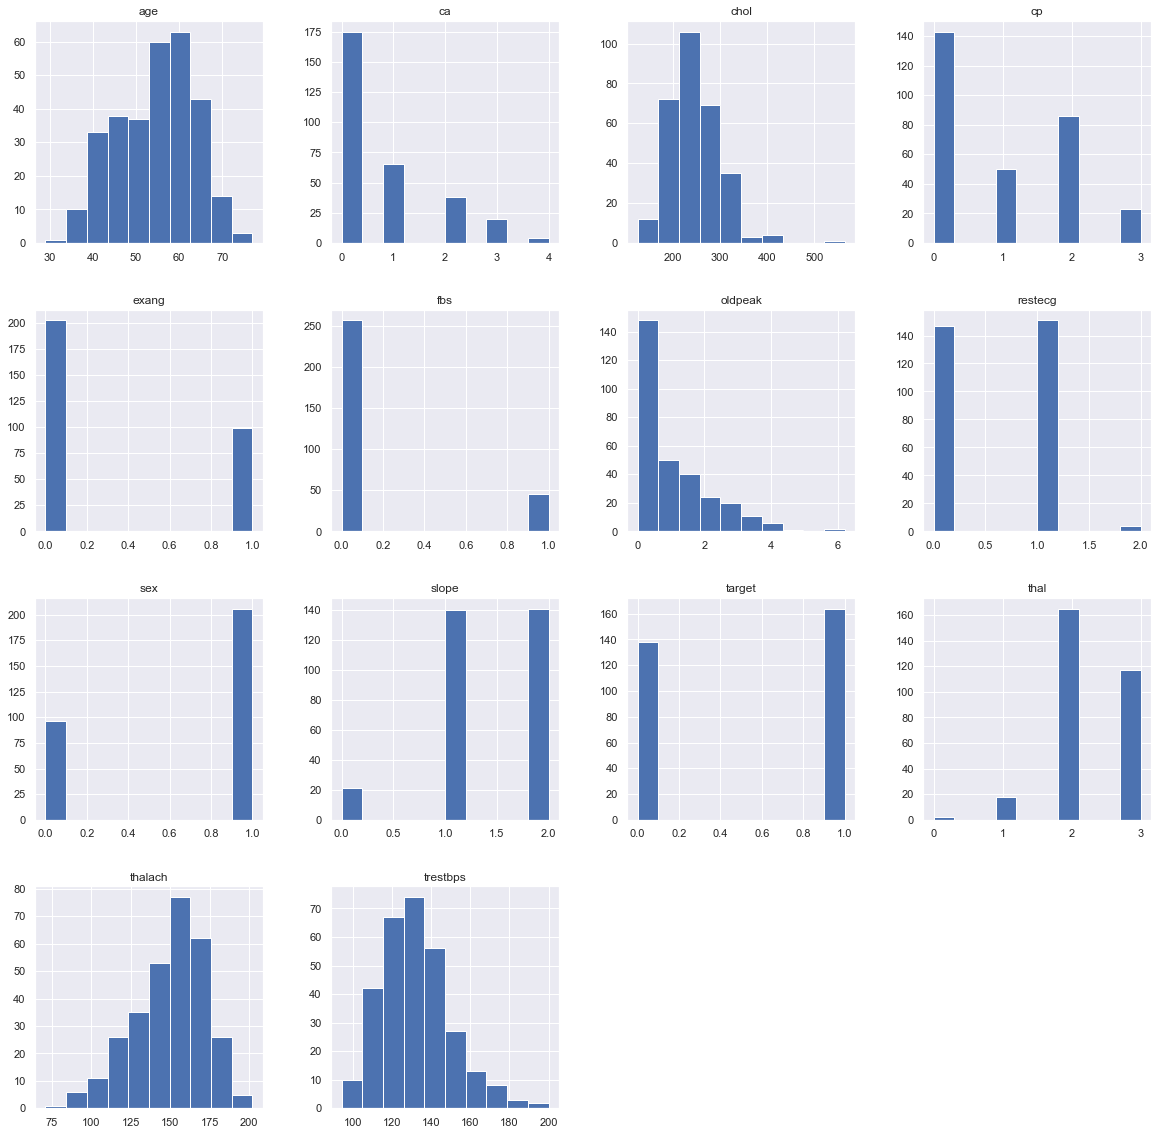

In [106]:
# plot histogram of dataframe
heart_df.hist(figsize=(20,20));

In [107]:
# I use the Correalation Matrix here understand the degree of association between the features.
heart_df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


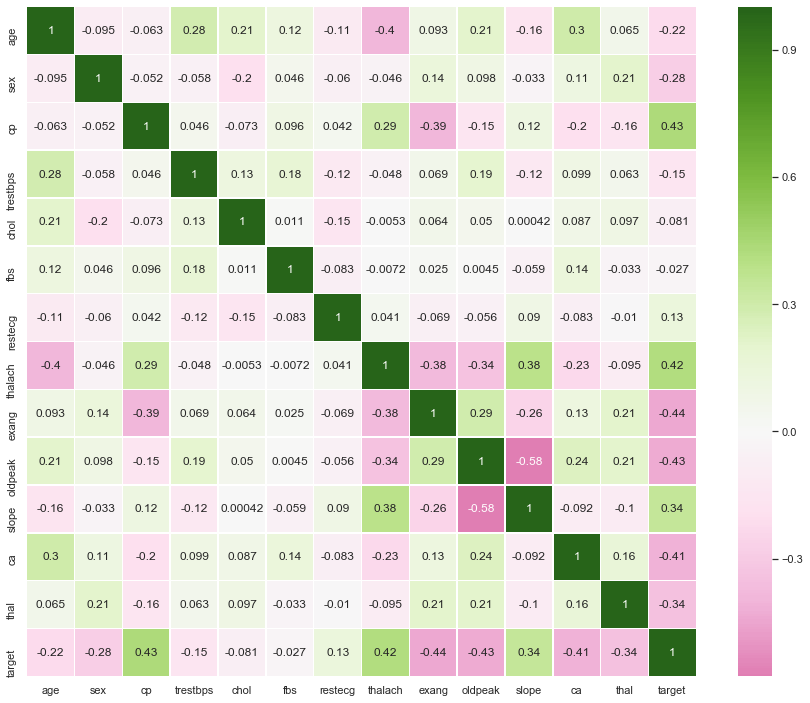

In [108]:
#plot the correlation matrix as a heatmap
f, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(heart_df.corr(), annot=True, cmap="PiYG", center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .82})

I find no feature that has a significant correalation with the target value. Some features even have negative correlation with the target value, but few features have lower positive correlation.

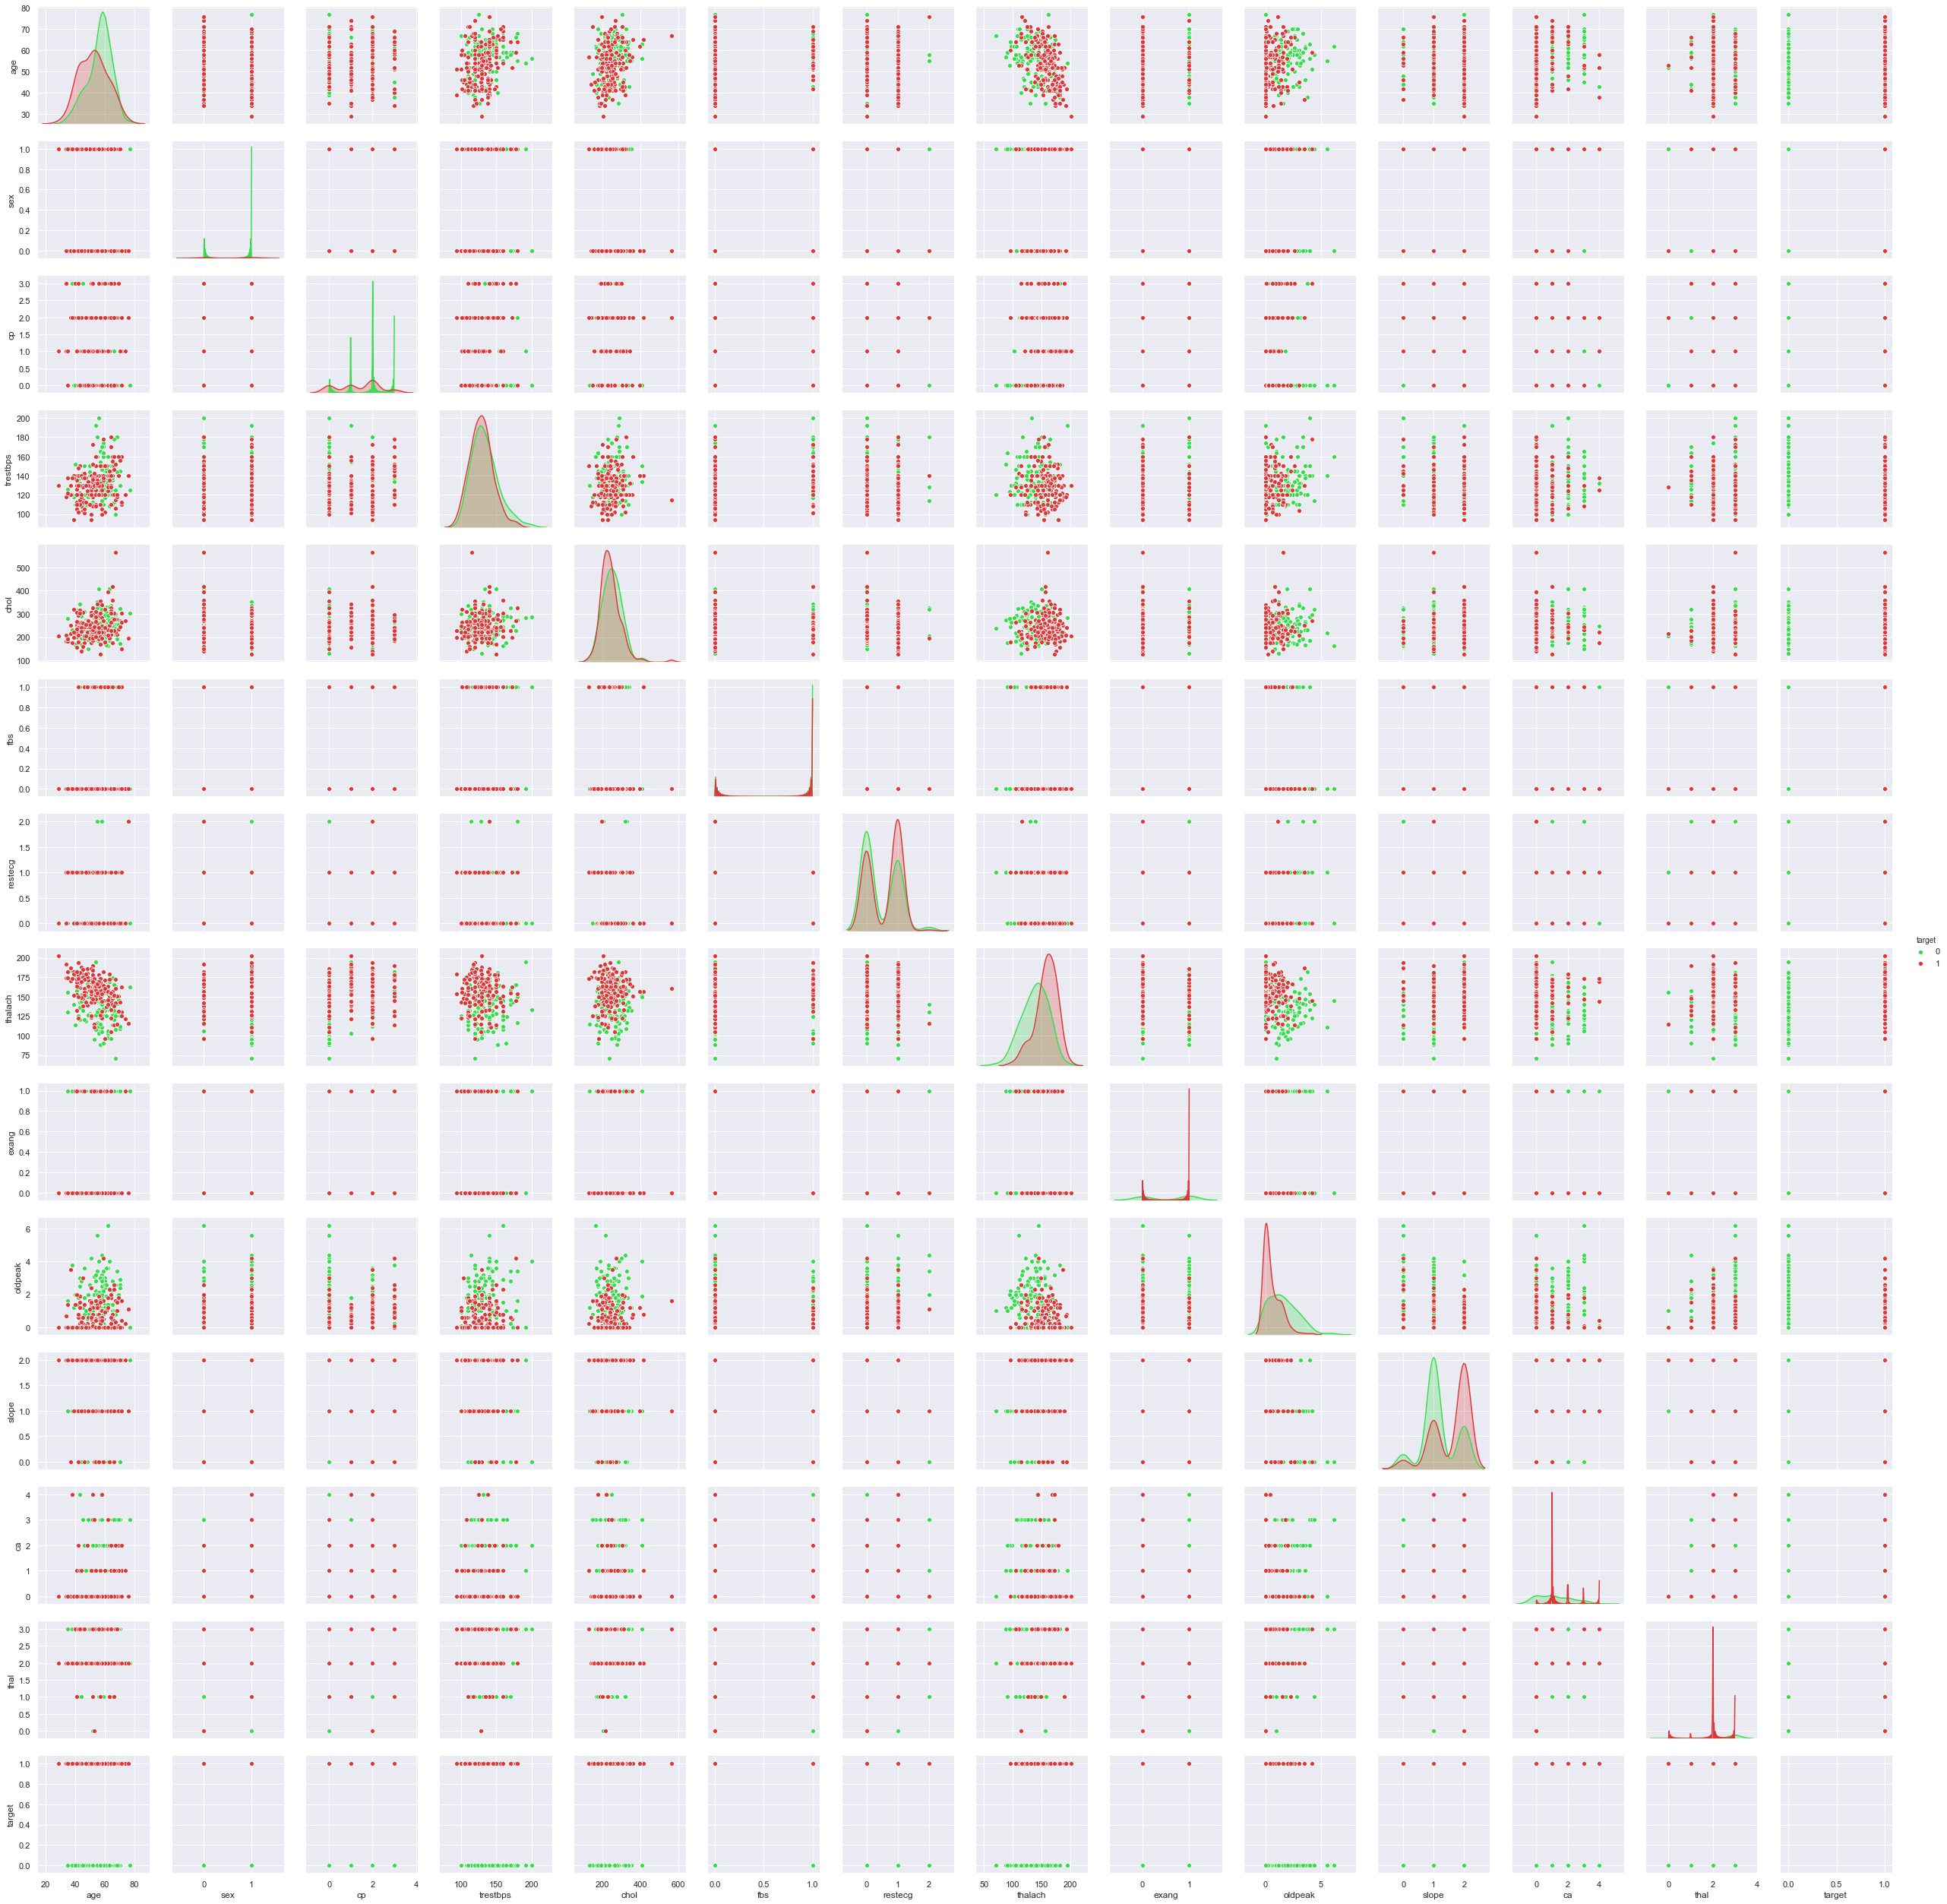

In [109]:
# pairplot
target_colors = ["#39db4d", "#db3939"]
sns.set_palette(target_colors)
sns.pairplot(heart_df, hue='target')
plt.show();